In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import time
from collections import OrderedDict

In [2]:
points = [
    (0, 1),
    (10, 6),
    #
    (0.5, 0), #2
    (0.5, 2), #3
    (5, 2),   #4
    (5, 0),   #5
    #
    (0.3, 3), #6
    (0, 4),   #7
    (2, 6),   #8
    (2.5,4),  #9
    (2, 2.6), #10
    #
    (2.5, 2.5),  #11
    (3.25, 4.5), #12
    (4, 2.5),    #13
    #
    (4, 3.5), #14
    (4, 6),   #15
    (5, 6.2), #16
    (6, 5),   #17
    #
    (6, 1),    #18
    (5.4, 3.3),#19
    (7, 2.2),  #20
    #
    (6.5, 3), #21
    (6.5, 6), #22
    (8, 6),   #23
    (8, 3),   #24
    # 
    (7.5,.7),  #25
    (7.5, 2.1),#26
    (8.2, 2.8),#27
    (9.2, 2.1),#28
    (9.2, .7), #29
    #
    (8.2, 5.6),#30
    (9, 6.05), #31
    (9.8, 5.5),#32
    (9.4, 2.4) #33
]




<IPython.core.display.Javascript object>


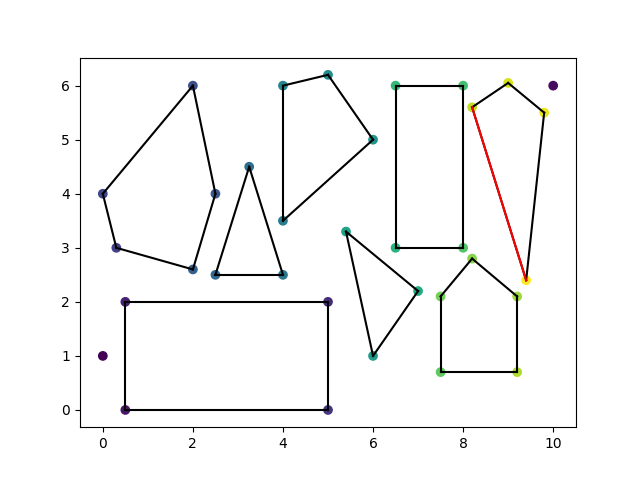

C:\Users\Igor\AppData\Local\conda\conda\envs\nb35\lib\site-packages\matplotlib\backend_bases.py:2453: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


In [3]:
shapes = [(2,5), (6,10), (11,13), (14,17), (18,20), (21,24), (25,29), (30,33)]
edges =OrderedDict()
for i in range(len(shapes)):
    minimum, maximum = shapes[i]
    for key in range(minimum, maximum+1):
        nxt = key+1 if key!=maximum else minimum
        edges[points[key]] = points[nxt]
x = [i[0] for i in points]
y = [i[1] for i in points]
color = range(len(x))
plt.ion()
plt.show()

fig, ax = plt.subplots()
ax.scatter(x,y, c=color)

for x1,y1 in edges.keys():
    x2,y2 = edges[(x1,y1)]
    line = mlines.Line2D([x1, x2], [y1,y2], color='black')
    ax.add_line(line)
    try:
        plt.pause(0.5)
    except Exception:
        pass
    plt.draw()
    
   
    

line = mlines.Line2D([x1, x2], [y1,y2], color = 'red')
ax.add_line(line)
plt.draw()
plt.ioff()

In [4]:
def assignValues(nextDict, point1, point2,nxt):
    nxt.append(point2)
    try:
        if nextDict[point2] and point1 not in nextDict[point2]:
            nextDict[point2].append(point1)
    except KeyError:
        nextDict[point2] = [point1]
    return nextDict, nxt

def crossWithEdges (point1, point2, edges):
    x1,y1 = point1
    x2,y2 = point2
    # find if line from point 1 to point 2 crosses 1 of the edges
    crossing = False
    for x3,y3 in edges.keys():
        x4,y4 = edges[(x3,y3)]
        det = (x2-x1)*(y3-y4) - (y2-y1)*(x3-x4)
        # line from point 1 to point 2 is parallel to the edge
        if abs(det) < 10e-3:
            continue
        else:
            lam1 = ((y3-y4)*(x3-x1) + (x4-x3)*(y3-y1))/det
            lam2 = ((y1-y2)*(x3-x1) + (x2-x1)* (y3-y1))/det
            # lines cross if both parameters are between 0 and 1
            if 0 < lam1 < 1 and 0<lam2 <1:
                return True
            else:
                continue
    return False

def nextPointDict(points, edges, shapes):
    nextDict = {}
    shapeIndex  =0
    for count1, point1 in enumerate(points):
        if (shapes[shapeIndex][1] < count1):
            shapeIndex+=1
        try:
            nxt = nextDict[point1] 
        except KeyError:
            nxt = []
        for count2, point2 in enumerate(points):
            if count2> count1 and count1>1:
                # point 1 and 2 belong to the same shape and are on adjecent edge
                if edges[point1] == point2 or edges[point2]== point1:
                    nextDict, nxt = assignValues(nextDict, point1, point2, nxt)
                # point 1 and 2 belong to the same shape and are not on adjecent edge
                elif (shapes[shapeIndex][0]<=count2 <= shapes[shapeIndex][1] ):
                    continue
                # points 1 and 2 are on different shapes
                elif not crossWithEdges(point1, point2, edges): 
                    nextDict, nxt = assignValues(nextDict, point1, point2, nxt)
                  
        nextDict[point1] = nxt
    
    return nextDict
    

In [5]:
m = nextPointDict(points,edges, shapes)

In [6]:
def addDestination (start, end, nextDict, points, edges, shapes):
    if start == end:
        return nextDict
    elif not crossWithEdges(start,end, edges):
        nextDict[start] = [end]
        return nextDict
    
    startNext = []
    for count, point in enumerate(points):
        if count >1: # skip start and end
            if not crossWithEdges(start, point, edges):
                startNext.append(point)
            if not crossWithEdges(end, point, edges):
                nextDict[point].append(end)
    nextDict[start] = startNext
    
    return nextDict
        

In [7]:
m = addDestination(points[0], points[1], m, points, edges, shapes)

In [8]:
import queue
import copy
def bestFirstSearch(m,start,end):
    plt.ion()
    
    plt.show()
    fig = plt.figure(figsize =(5,3))
    fig.suptitle("Navigation Through Maze")
    
    ax = fig.add_axes([.05,.05,.65,.85])
    
    
    
    ax.scatter(x,y, color ='black')
    x11 = copy.deepcopy(x)
    y11 = copy.deepcopy(x)
    
    #only needed for graphing
    lines = set()
    expandedPts = set()
    pathPts = set()
    nextPts = set()
    
    # contains next elements to visit in priority queue each element is of the form (f, g, previousPoint, point)
    # g - total cost to reach point, f = g + h, where h is straight line distance from point to goal
    successors = queue.PriorityQueue()
    # duplicates part of the information contained in successors in a map structure in the form {point: g}
    # used to eliminate extra processing for the elements that were already reached
    successorsM = {}
    # contains map of all the expanded notes in the form {expandedPoint: g}
    expanded = OrderedDict()
    
    #draw initial state
    for x1,y1 in edges.keys():
        x2,y2 = edges[(x1,y1)]
        line = mlines.Line2D([x1, x2], [y1,y2], color='black')
        ax.add_line(line)
        
        plt.draw()
    # legends 
    
    line_path, = plt.plot([], color = 'cyan', label='Best path')
    line_old, = plt.plot([], color = 'grey', label='Tried path')
    ptsPath, = plt.plot([], marker = 'o', color = 'cyan', label = 'On best path')
    ptsOld, = plt.plot ([], marker = 'o', color = 'grey', label = 'Tried points')
    ptsGoal, = plt.plot ([], marker = 'o', color = 'orange', label = 'Destination')
    ptsAllNext, = plt.plot ([], marker = 'o', color = 'green', label = 'Search Border')
    ptsNext, = plt.plot ([], marker = 'o', color = 'yellow', label = 'Good next steps')
    
    plt.legend(handles = [line_path, line_old, ptsPath, ptsOld, ptsGoal, ptsAllNext, ptsNext], bbox_to_anchor = (1.25,0.5), loc = 10 )
    #['Best path', 'Tried path', 'Points along best path', 'tried points']


    
    # highligth goal
    ax.scatter(points[1][0], points[1][1], color = 'orange')
    ax.scatter(points[0][0], points[0][1], color = 'cyan')
    plt.draw()
    #plt.show()
    
    input("continue?")
    
    current = start
   
    currentH = ((end[1] - current[1])**2 + (end[0] - current[0])**2)**.5
    successors.put((currentH, 0, None, start))
    
    while not successors.empty():
        # get info for current step
        f, g, previous, current = successors.get()
        successorsM.pop(current, None)
        needExpand = True
        # draw next points
        for pt in nextPts:
            ax.scatter(pt[0], pt[1], color = 'green')
        # draw expanded points
        for pt in expandedPts:
            ax.scatter(pt[0], pt[1], color = 'grey')
        # draw current point
        ax.scatter(current[0], current[1], color = 'cyan')
        expandedPts.add(current)
        nextPts.discard(current)
        plt.draw()
            
        # draw lines that were used but not on current path
        if previous:
            lines.add((previous, current))
        for ln in lines:
            line = mlines.Line2D([ln[0][0], ln[1][0]], [ln[0][1],ln[1][1]], color = 'grey')
            ax.add_line(line)
            plt.draw()
        
        # check if current node was reached in the best path so far
        if current not in expanded.keys() or expanded[current][1]>g :
            expanded[current] = (previous, g)
        else:
            needExpand = False
            
        #draw current path
        pathPts = set()
        presentStep = current
        nextStep = previous
        while nextStep:
            line = mlines.Line2D([presentStep[0], nextStep[0]], [presentStep[1],nextStep[1]], color = 'cyan')
            ax.scatter(nextStep[0], nextStep[1], color = 'cyan')
            ax.add_line(line)
            presentStep = nextStep
            nextStep = expanded[presentStep][0]
        plt.draw()
        
        # Check if reached goal. Can be moved to the beginning, but stays here to do drawing for the current step
        if current == end:
            plt.ioff()
            return successors, expanded
        
        if needExpand:
            nxt = m[current]
            for point in nxt:
                dist = ((point[1] - current[1])**2 + (point[0] - current[0])**2)**.5
                h = ((end[1] - point[1])**2 + (end[0] - point[0])**2)**.5
                if (point not in expanded.keys() and point not in successorsM.keys()) or \
                    (point in expanded.keys() and expanded[point][1] > g+dist) or \
                    (point in successorsM.keys() and successorsM[point] > g+dist):
                    successors.put((g+dist+h, g+dist, current, point))
                    successorsM[point] = g+dist
                    nextPts.add(point)
                    ax.scatter(point[0], point[1], color = 'yellow')
                    try:
                        plt.pause(.5)
                    except:
                        time.sleep(.5)
                    plt.draw()
        
        
            
    plt.ioff()
    return None, expanded
    

<IPython.core.display.Javascript object>


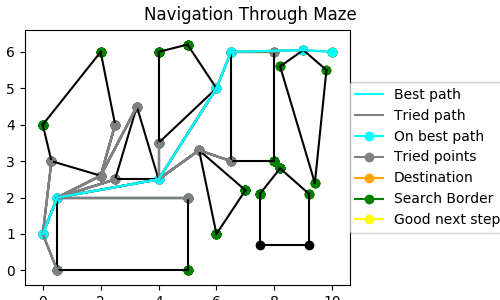

continue?y


C:\Users\Igor\AppData\Local\conda\conda\envs\nb35\lib\site-packages\matplotlib\backend_bases.py:2453: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


In [9]:
successors, expanded = bestFirstSearch(m, points[0], points[1])
#might be able to improve by checking that current time to a goal > expanded time to a goal

In [13]:
while not successors.empty():
    print (successors.get())

(12.51174614490547, 8.90619486944148, (6.5, 3), (8, 3))
(12.67820001555345, 6.67820001555345, (2, 2.6), (4, 6))
(12.681495391764994, 9.181495391764994, (5.4, 3.3), (6.5, 6))
(12.764286489107489, 10.92037759764891, (8, 6), (8.2, 5.6))
(12.789431096441012, 9.117919146303848, (6.5, 3), (8.2, 2.8))
(12.98300482481978, 12.444488344106329, (9, 6.05), (9.8, 5.5))
(13.049155603001184, 8.207668228237102, (5.4, 3.3), (7, 2.2))
(13.198039027185569, 3.0, (0, 1), (0, 4))
(13.317190697592096, 8.684696768831907, (5.4, 3.3), (7.5, 2.1))
(13.428283664656549, 5.618033988749895, (0.5, 0), (5, 0))
(13.435371788555837, 7.03224755112299, (5, 2), (6, 1))
(14.281743118430928, 6.281743118430928, (2.5, 4), (2, 6))
(14.42117834985911, 9.417179948580388, (6, 5), (5, 6.2))
(14.960458932975742, 6.960458932975742, (3.25, 4.5), (2, 6))
(15.046116546576133, 8.642992309143285, (5.4, 3.3), (6, 1))
(15.428283664656549, 7.618033988749895, (5, 2), (5, 0))
(17.400423147967928, 9.590173472061274, (5.4, 3.3), (5, 0))
(17.9854

In [14]:
expanded



OrderedDict([((0, 1), (None, 0)),
             ((0.5, 2), ((0, 1), 1.118033988749895)),
             ((2, 2.6), ((0.5, 2), 2.7335834308902465)),
             ((2.5, 2.5), ((0.5, 2), 3.179586801558725)),
             ((4, 2.5), ((0.5, 2), 4.653567894682633)),
             ((5.4, 3.3), ((4, 2.5), 6.2660194443423425)),
             ((3.25, 4.5), ((2, 2.6), 5.0078965139990785)),
             ((6, 5), ((4, 2.5), 7.855130013399057)),
             ((2.5, 4), ((2, 2.6), 4.220190305622097)),
             ((6.5, 3), ((5.4, 3.3), 7.40619486944148)),
             ((5, 2), ((0.5, 2), 5.618033988749895)),
             ((4, 3.5), ((4, 2.5), 5.653567894682633)),
             ((0.3, 3), ((0, 1), 2.0223748416156684)),
             ((0.5, 0), ((0, 1), 1.118033988749895)),
             ((6.5, 6), ((6, 5), 8.973164002148952)),
             ((8, 6), ((6.5, 6), 10.473164002148952)),
             ((9, 6.05), ((6.5, 6), 11.47366395215895)),
             ((10, 6), ((9, 6.05), 12.474913171883989))])

In [15]:
path = queue.LifoQueue()
current = (10,6)


In [16]:
while current:
    path.put (current)
    current = expanded[current][0]

In [17]:
while not path.empty():
    print (path.get())

(0, 1)
(0.5, 2)
(4, 2.5)
(6, 5)
(6.5, 6)
(9, 6.05)
(10, 6)


In [44]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

In [50]:
ax.add_table

In [51]:
plt.draw()

In [66]:
fig, ax = plt.subplots()
color = range(len(x))
ax.plot(x,y, c=color)



In [12]:
lines = set()

In [27]:
lines.discard

<function set.discard>

In [28]:
d = {1:5}

In [28]:
fig = plt.figure()

In [29]:
ax = fig.add_axes([0, 0, .7, 1])

In [30]:
ax.plot([1,2])

In [31]:
fig.canvas.draw()

In [61]:
fig.text("hello")
ax.add_

TypeError: text() missing 2 required positional arguments: 'y' and 's'